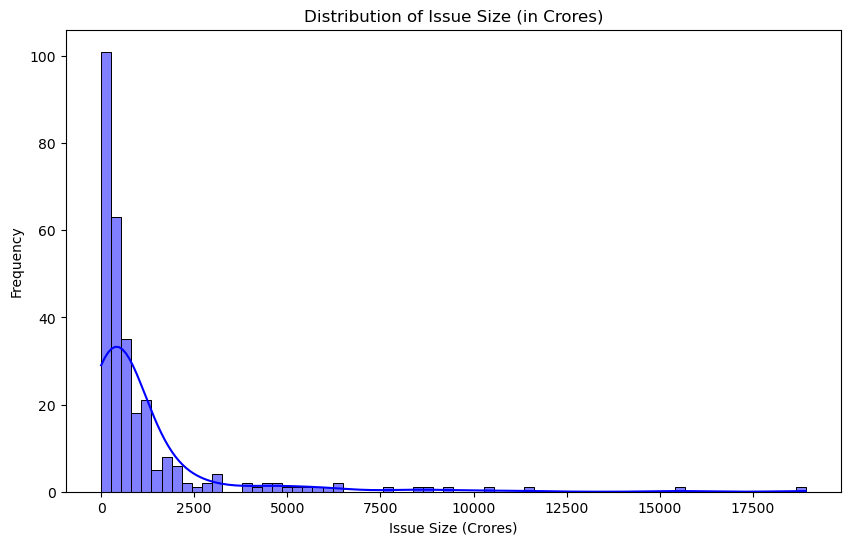

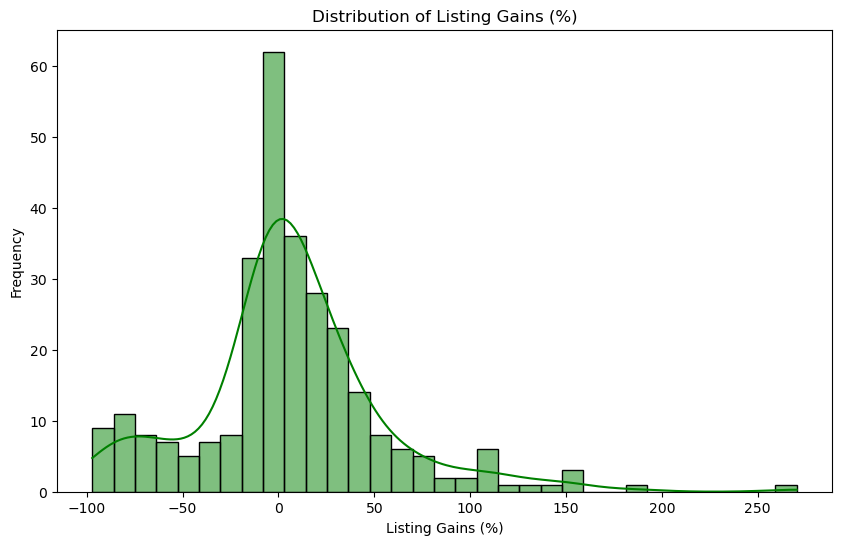

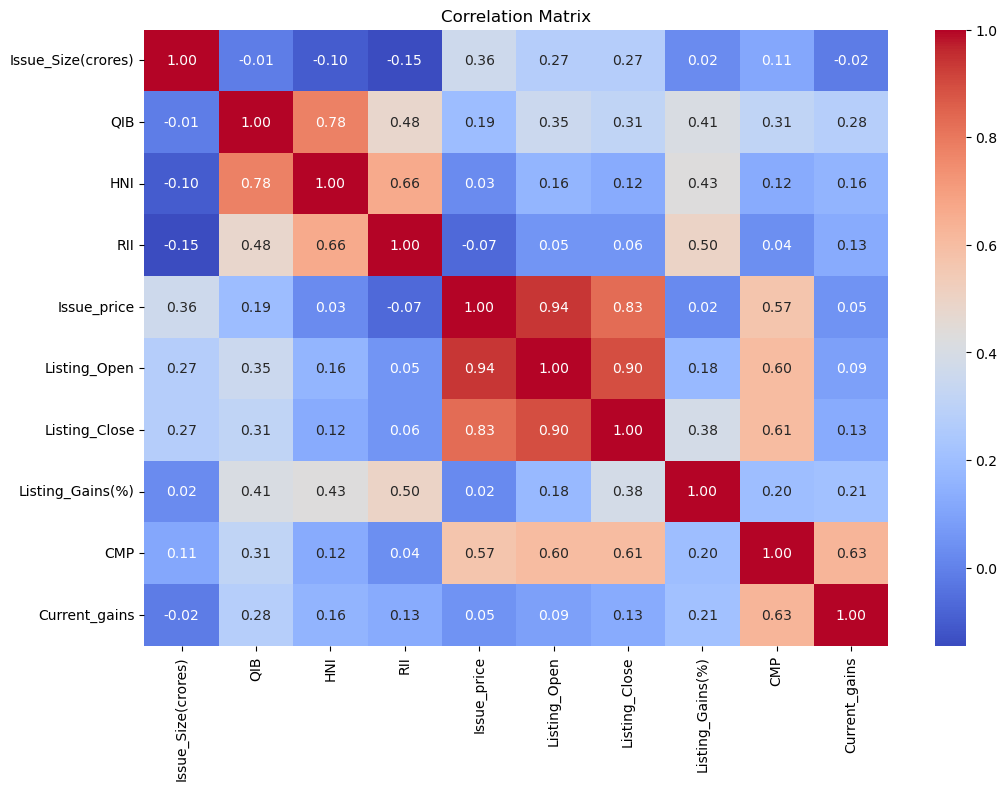

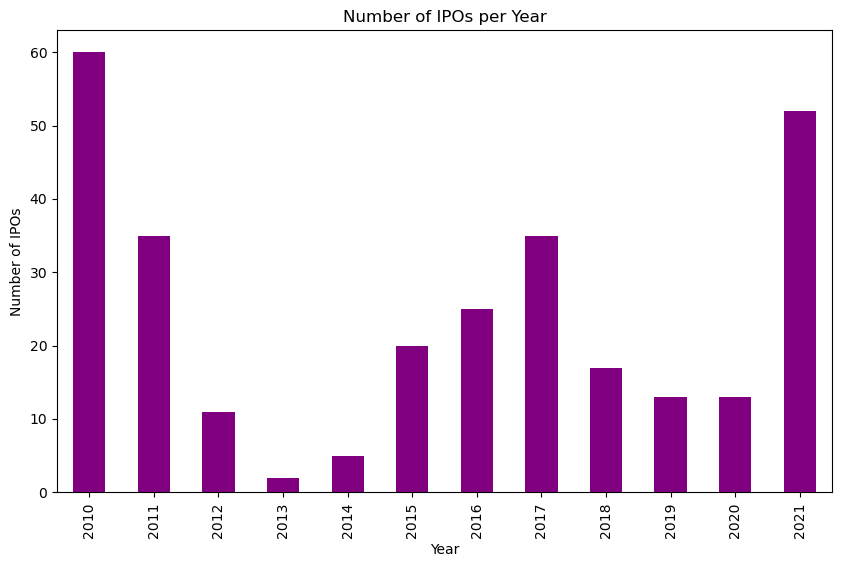

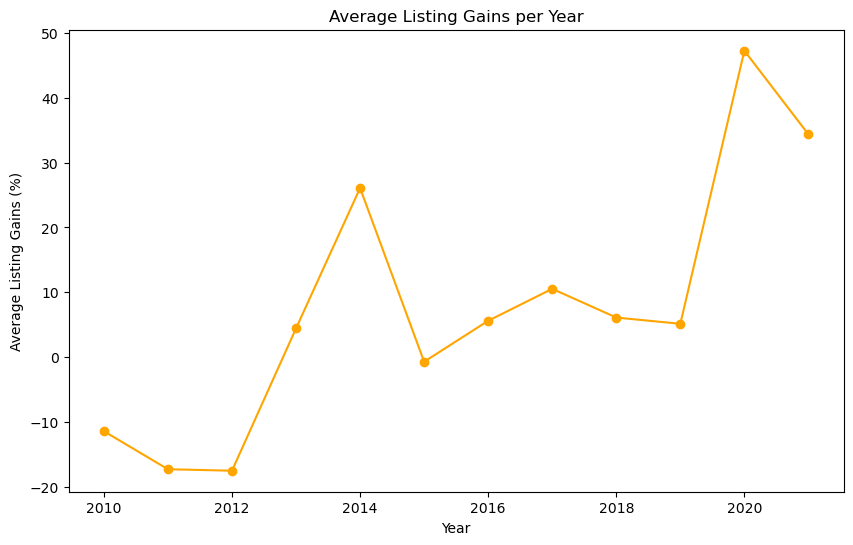

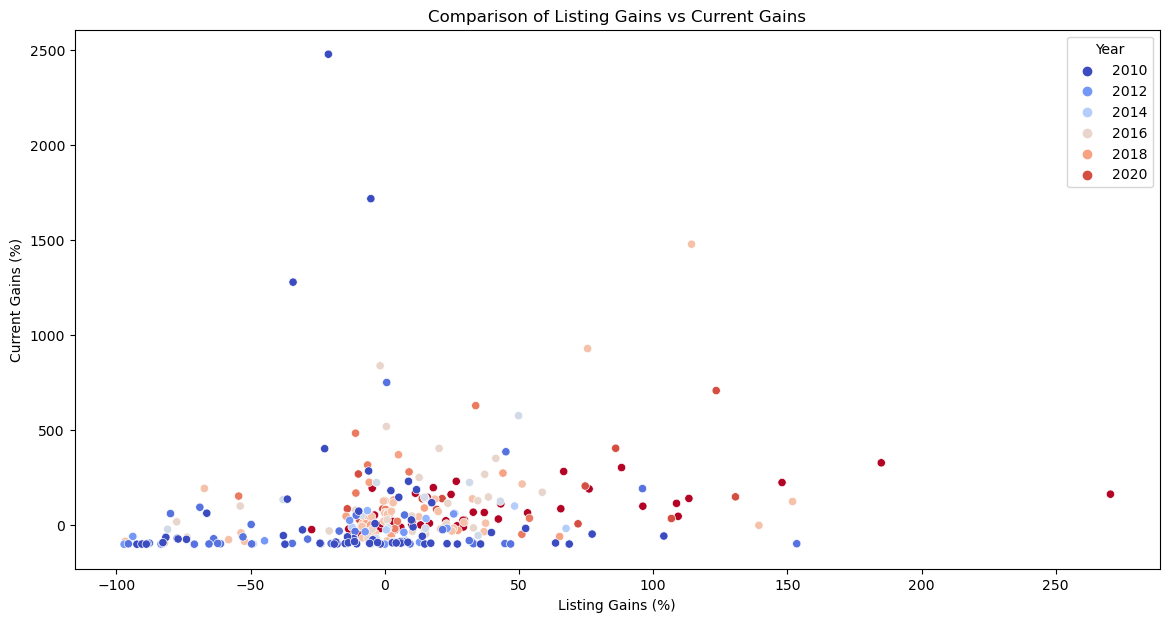

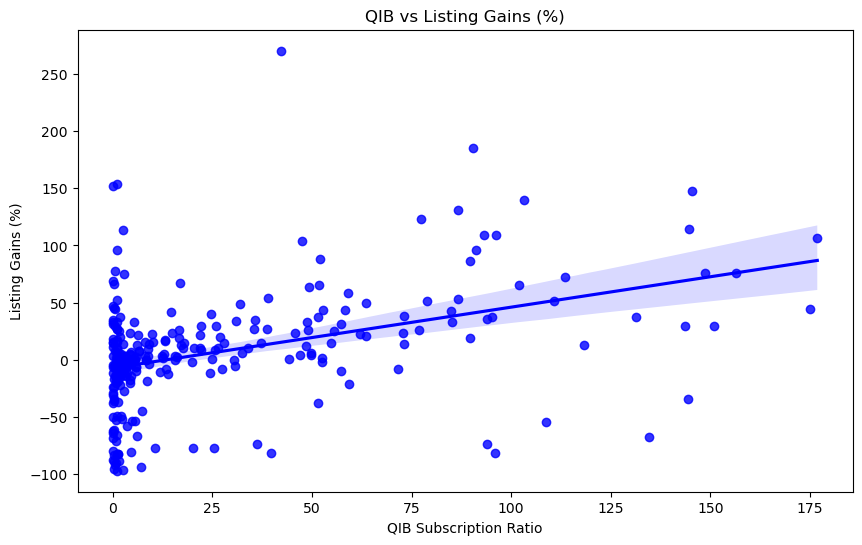

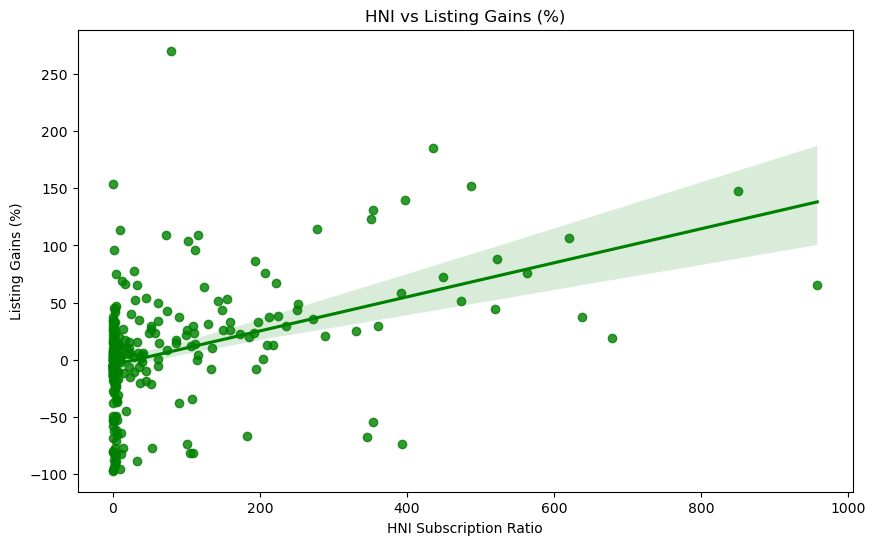

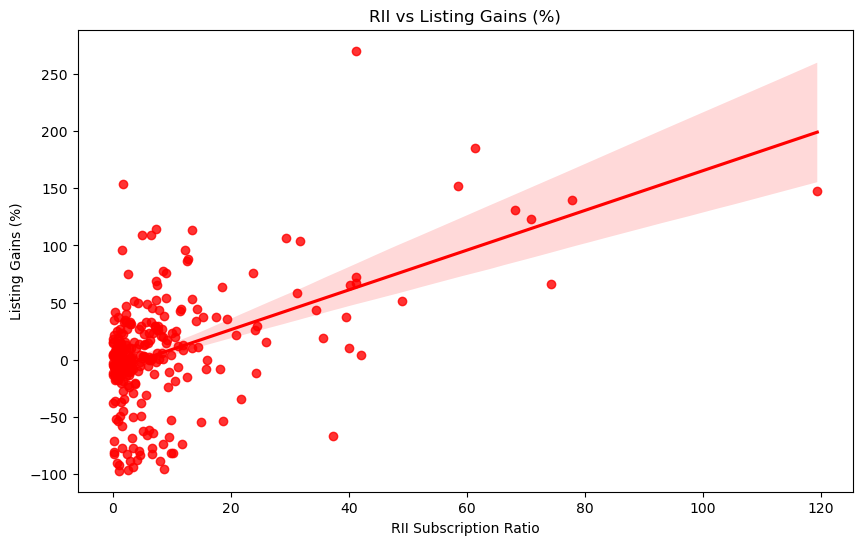

Mean Squared Error: 2343.819597382619
R-squared: 0.20155196444207235


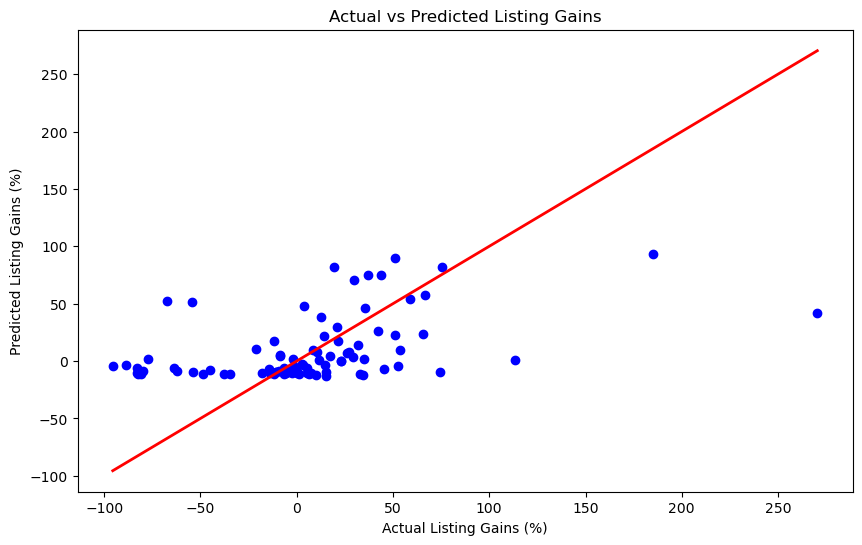

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Vaibhav\Desktop\Data Science\Data analysis project\Stock_market_prediction\IPO.csv"
ipo_data = pd.read_csv(file_path)

# Data Cleaning
# Convert 'Date' to datetime format
ipo_data['Date'] = pd.to_datetime(ipo_data['Date'], format='%d-%m-%y')

# Clean the 'CMP' column: remove commas and convert to float
ipo_data['CMP'] = ipo_data['CMP'].str.replace(',', '').astype(float)

# Handle missing values in 'Current_gains'
ipo_data['Current_gains'].fillna(ipo_data['Current_gains'].mean(), inplace=True)

# Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = ipo_data.describe()

# Distribution of Issue Size
plt.figure(figsize=(10, 6))
sns.histplot(ipo_data['Issue_Size(crores)'], kde=True, color='blue')
plt.title('Distribution of Issue Size (in Crores)')
plt.xlabel('Issue Size (Crores)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Listing Gains
plt.figure(figsize=(10, 6))
sns.histplot(ipo_data['Listing_Gains(%)'], kde=True, color='green')
plt.title('Distribution of Listing Gains (%)')
plt.xlabel('Listing Gains (%)')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(ipo_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis: Number of IPOs over time
ipo_data['Year'] = ipo_data['Date'].dt.year
ipos_per_year = ipo_data.groupby('Year').size()

plt.figure(figsize=(10, 6))
ipos_per_year.plot(kind='bar', color='purple')
plt.title('Number of IPOs per Year')
plt.xlabel('Year')
plt.ylabel('Number of IPOs')
plt.show()

# Time Series Analysis: Average Listing Gains over time
avg_listing_gains_per_year = ipo_data.groupby('Year')['Listing_Gains(%)'].mean()

plt.figure(figsize=(10, 6))
avg_listing_gains_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Listing Gains per Year')
plt.xlabel('Year')
plt.ylabel('Average Listing Gains (%)')
plt.show()

# Comparison of Listing Gains vs Current Gains
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Listing_Gains(%)', y='Current_gains', data=ipo_data, hue='Year', palette='coolwarm')
plt.title('Comparison of Listing Gains vs Current Gains')
plt.xlabel('Listing Gains (%)')
plt.ylabel('Current Gains (%)')
plt.show()

# Investor Analysis: QIB, HNI, and RII vs Listing Gains
plt.figure(figsize=(10, 6))
sns.regplot(x='QIB', y='Listing_Gains(%)', data=ipo_data, color='blue')
plt.title('QIB vs Listing Gains (%)')
plt.xlabel('QIB Subscription Ratio')
plt.ylabel('Listing Gains (%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='HNI', y='Listing_Gains(%)', data=ipo_data, color='green')
plt.title('HNI vs Listing Gains (%)')
plt.xlabel('HNI Subscription Ratio')
plt.ylabel('Listing Gains (%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='RII', y='Listing_Gains(%)', data=ipo_data, color='red')
plt.title('RII vs Listing Gains (%)')
plt.xlabel('RII Subscription Ratio')
plt.ylabel('Listing Gains (%)')
plt.show()

# Conclusions and Insights
# - Listing gains are influenced by the subscription ratios of QIB, HNI, and RII.
# - The number of IPOs has varied significantly over the years.
# - There is a notable correlation between listing gains and current gains, indicating that initial performance often predicts longer-term performance.

# Optional: Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = ipo_data[['Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Issue_price']]
y = ipo_data['Listing_Gains(%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Listing Gains')
plt.xlabel('Actual Listing Gains (%)')
plt.ylabel('Predicted Listing Gains (%)')
plt.show()
